In [1]:
import nrrd
from scipy import ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import skimage.measure as measure
from skimage import draw
from progress.bar import Bar
from scipy.ndimage import zoom
import patchify

In [2]:
def gen_rand_cube(arr):
    """
    Generate a volume of size <size> with a randomly placed cuboid with sides of random length
    :param size: 3-Dimensional tuple with size of volume
    :param seed: seed for random number generator
    :return: Returns volume as float32-Numpy array with size <size>
    """

    middle = np.random.randint(17,48,3)
    height = np.random.randint(1,16)
    length = np.random.randint(1,16)
    width = np.random.randint(1,16)
    cube = np.ones((height,length, width))*0.5
    arr[middle[0]-int(np.floor(height/2)):middle[0]+int(np.ceil(height/2)), middle[1]-int(np.floor(length/2)):middle[1]+int(np.ceil(length/2)), middle[2]-int(np.floor(width/2)):middle[2]+int(np.ceil(width/2))] = cube
    arr_f =np.array(arr, dtype='float32')

    return arr_f


def plot_3d(image, threshold=-300):
    """
    Plots a greyscale 3d numpy array above a certain threshold.
    :param image: 3d numpy array
    :param threshold: int
    :return:
    """
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()

def add_cyl(image):
    middle = np.random.randint(31,481,2)
    radius = np.random.randint(1,15)
    rr, cc = draw.disk(middle, radius)
    for i in np.arange(image.shape[2]):
        image[rr,cc,i] = 0.75
    return image



def rotate_im(image):
    """
    Rotates a 3D image along a random axis a random number of degrees.
    :param image: 3D input image
    :param seed: int seed for random number generator
    :return: rotated image
    """
    axis_ =  np.random.permutation([0,1,2])
    axis=axis_[:2]
    angle = np.random.choice([0,30,60,90,120,150,180,210,240,270,300,330])
    im_rot = ndimage.rotate(image, angle=angle, axes=axis, reshape=False, mode='constant', cval=0.5, order=1)
    return im_rot

def blur_im(image):
    """
    Blurs an image with a simple gauss filter
    :param image: input image
    :return: blurred iamge
    """
    im_blurred = ndimage.gaussian_filter(image, sigma=0.3, order=1)
    return im_blurred

def noise_im(image):
    """
    Adds gaussian noise to an input image
    :param image: input image
    :return: noisy output image
    """
    gauss = np.random.normal(0.0,0.02,image.shape)
    im_noisy = image + gauss
    return im_noisy

In [3]:
def gen_data(n_images):
    n=0
    m=0
    path_im="./training_data/train_cyl_grey_im/"
    path_la="./training_data/train_cyl_grey_la/"
    while n < n_images:
        im = np.ones((512,512,1000))*0.5
        im_cyl = add_cyl(im)
        im_rot = rotate_im(im_cyl)
        im_rot2 = rotate_im(im_rot)
        im_blur = noise_im(im_rot2)
        im_la = np.where(im_rot2>0.7,1,0)

        patches_im=patchify.patchify(im_blur, (512,512,40), step=40).squeeze()
        patches_la=patchify.patchify(im_la, (512,512,40), step=40).squeeze()

        for i in np.arange(patches_im.shape[0]):
            if float(np.max(patches_la[i,:,:,:])) < 1.0:
                pass
            else:
                nrrd.write(path_im + "cylinder_" + str(m) + '_' + str(i) + ".nrrd", patches_im[i,:,:,:])
                nrrd.write(path_la + "cylinder_" + str(m) + '_' + str(i) + ".seg.nrrd", patches_la[i,:,:,:])
                n = n+1
        m=m+1

In [4]:
gen_data(1000)

In [80]:
print(np.max(im_rot2))

1.1960831269608356


In [4]:
im = np.zeros((512,512,40))
im_cyl = add_cyl(im)
im_rot = rotate_im(im_cyl)
im_rot2 = rotate_im(im_rot)
im_blur = blur_im(im_rot2)
image_norm = (im_blur - np.min(im_blur))/(np.max(im_blur)-np.min(im_blur))
label_norm = (im_rot2 - np.min(im_rot2))/(np.max(im_rot2)-np.min(im_rot2))

In [8]:
plot_3d(im_rot2,0.1)

ValueError: Surface level must be within volume data range.

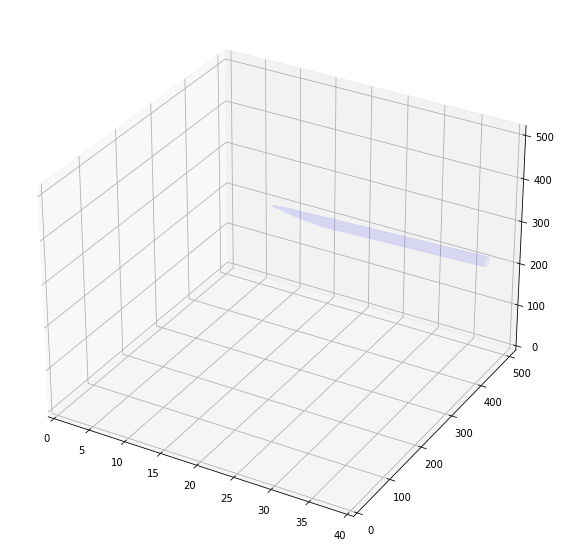

In [73]:
plot_3d(im_rot2, 0.1

In [62]:
def gen_cyl():

    length = np.random.randint(10,1000)
    radius = np.random.randint(2,10)
    middle = np.random.randint()
    cyl = np.zeros((512,512,40))
    rr, cc = draw.disk((middle), radius)
    for i in np.arange(cyl.shape[2]):
        cyl[rr,cc,i] = 1
    return cyl

In [69]:
cylinder = gen_cyl()

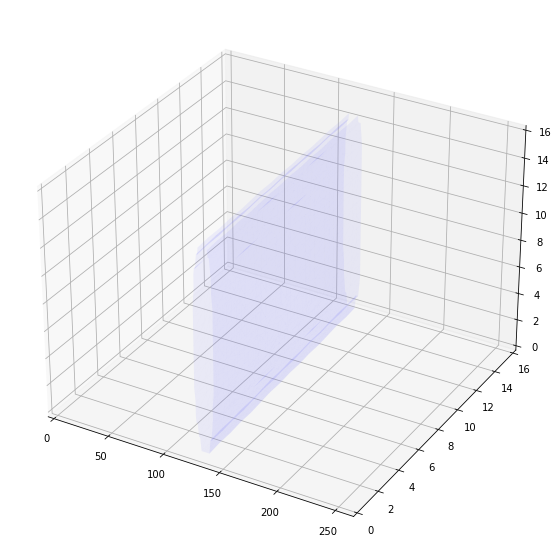

In [70]:
plot_3d(rotate_im(cylinder), 0.5)

In [54]:
import numpy as np
import nrrd

In [63]:
def is_in_cyl(pt1, pt2, r, q):
    vec = pt2-pt1
    const = r * np.linalg.norm(vec)
    if (np.dot(q - pt1, vec) >= 0 and np.dot(q - pt2, vec) <= 0 and np.linalg.norm(np.cross(q - pt1, vec)) <= const):
        return True
    else:
        return False

def gen_cyl():
    image = np.zeros((512,512,40))
    radius = np.random.randint(1,15)
    p1xyz = np.random.randint(0,511,3)
    p1 = np.array(p1xyz)
    p2xyz = np.random.randint(0,511,3)
    p2 = np.array(p2xyz)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            for z in np.arange(image.shape[2]):
                if is_in_cyl(p1,p2,radius,np.array([x,y,z])):
                    image[x,y,z] = 1
    return image




In [50]:
a = is_in_cyl(np.array([0,0,0]),np.array([10,0,0]),0.2,np.array([5,0.1,0]))

In [51]:
print(a)

True


In [64]:
image = gen_cyl()

In [66]:
print(np.max(image))

0.0


In [65]:
nrrd.write('test_cyl.nrrd', image)